In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x1 = [98,99,99,99,99,99.5,99.5,100,100,101,102.5,108]
x2 = [135,135,134,133,131,129.5,127.5,126.5,126.5,124,120,108]
T = [12,15,18,21,24,27,30,31,32,33,34,35]

In [3]:
fi = 4.27
dx = 1.5
dL = 10
L = 1270+3690

Törésmutató számítása:

In [4]:
fi1 = []
for i in range(len(x1)):
    fi1.append((x1[i]/L)*(180/pi))
#szögeltérülés x1-re
print(fi1)

[1.1320537081213846, 1.1436052765716027, 1.1436052765716027, 1.1436052765716027, 1.1436052765716027, 1.1493810607967119, 1.1493810607967119, 1.155156845021821, 1.155156845021821, 1.1667084134720391, 1.1840357661473664, 1.2475693926235667]


In [5]:
fi2 = []
for i in range(len(x2)):
    fi2.append((x2[i]/L)*(180/pi))
#szögeltérülés x2-re
print(fi2)

[1.5594617407794584, 1.5594617407794584, 1.54791017232924, 1.536358603879022, 1.5132554669785856, 1.4959281143032581, 1.472824977402822, 1.4612734089526036, 1.4612734089526036, 1.4323944878270582, 1.3861882140261852, 1.2475693926235667]


In [6]:
n = []
def tor(fi1,fi,n):
    for i in range(len(fi1)):
        n.append( 1 + (fi1[i]/fi))
    return n

In [7]:
n1 = []
n1 = tor(fi1,fi,n1)
n2 = []
n2 = tor(fi2,fi,n2)

Az n1-re kapott értékek:

In [8]:
print(n1)

[1.2651179644312376, 1.2678232497825768, 1.2678232497825768, 1.2678232497825768, 1.2678232497825768, 1.2691758924582464, 1.2691758924582464, 1.270528535133916, 1.270528535133916, 1.2732338204852551, 1.2772917485122637, 1.2921708179446292]


Az n2-re kapott értékek:

In [9]:
print(n2)

[1.3652135224307864, 1.3652135224307864, 1.3625082370794472, 1.3598029517281083, 1.35439238102543, 1.3503344529984211, 1.3449238822957428, 1.3422185969444036, 1.3422185969444036, 1.3354553835660559, 1.3246342421606991, 1.2921708179446292]


In [10]:
#szögmérés hibája
deltafi1 = []
for i in range(len(fi1)):
    deltafi1.append((fi1[i] * ((dx/x1[i]) + (dL/L))))
    #deltafi1.append(1/L * dx + x1[i]/(L**2) * dL)

In [11]:
print(deltafi1)

[0.019609719022346237, 0.019633008474866834, 0.019633008474866834, 0.019633008474866834, 0.019633008474866834, 0.019644653201127137, 0.019644653201127137, 0.019656297927387437, 0.019656297927387437, 0.019679587379908034, 0.01971452155868894, 0.019842613547552245]


In [12]:
#szögmérés hibája
deltafi2 = []
for i in range(len(fi2)):
    deltafi2.append((fi2[i] * ((dx/x2[i]) + (dL/L))))
    #deltafi2.append(1/L * dx + x2[i]/(L**2) * dL)

In [13]:
print(deltafi2)

[0.020471428765608483, 0.020471428765608483, 0.02044813931308788, 0.02042484986056728, 0.02037827095552608, 0.02034333677674517, 0.020296757871703975, 0.02027346841918337, 0.02027346841918337, 0.02021524478788187, 0.020122086977799464, 0.019842613547552245]


A törésmutató hibája: 

In [14]:
deltan1 = []
deltan2 = []

In [15]:
for i in range(len(deltafi1)):
    deltan1.append(deltafi1[i]/fi)
    #deltan1.append(fi/(fi1[i]**2) * deltafi1[i])

In [16]:
for i in range(len(deltafi2)):
    deltan2.append(deltafi2[i]/fi)
    #deltan2.append(fi/(fi2[i]**2) * deltafi2[i])

In [17]:
print(deltan1)

[0.004592440052071719, 0.004597894256409095, 0.004597894256409095, 0.004597894256409095, 0.004597894256409095, 0.004600621358577785, 0.004600621358577785, 0.004603348460746473, 0.004603348460746473, 0.0046088026650838495, 0.004616983971589916, 0.004646982095445491]


In [18]:
print(deltan2)

[0.0047942456125546805, 0.0047942456125546805, 0.0047887914082173026, 0.0047833372038799254, 0.004772428795205171, 0.004764247488699104, 0.0047533390800243505, 0.0047478848756869725, 0.0047478848756869725, 0.00473424936484353, 0.0047124325474940205, 0.004646982095445491]


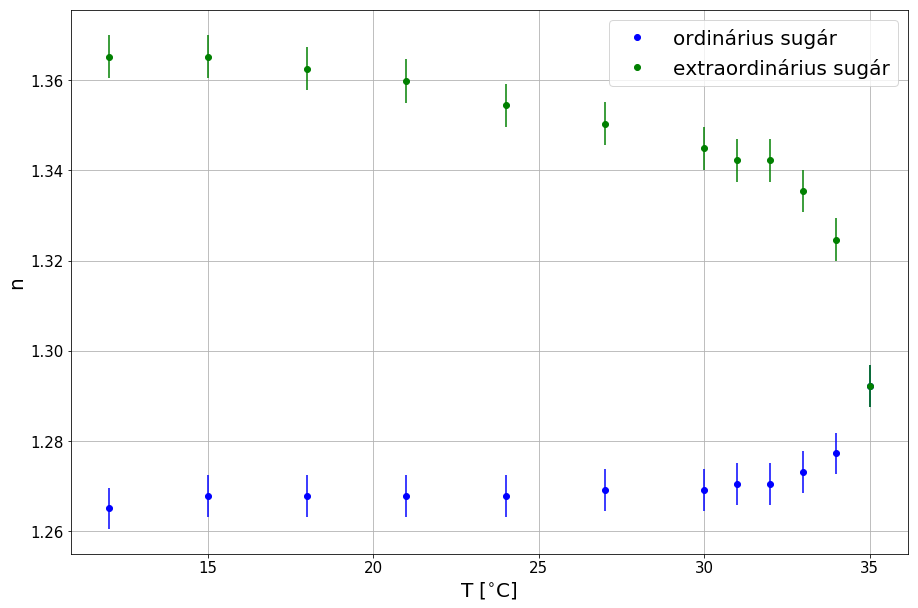

In [19]:
figure(figsize = (15,10))
plot(T,n1,'bo', label = 'ordinárius sugár')
errorbar(T,n1,deltan1,ms=6,c = 'b',linestyle = '')
plot(T,n2,'go', label = 'extraordinárius sugár')
errorbar(T,n2,deltan2,ms= 6,c = 'g', linestyle = '')
xlabel('T [$^{\circ}$C]', fontsize = 20)
ylabel('n', fontsize = 20)
#title('A törésmutató a hőmérséklet függvényében', fontsize = 30)
plt.tick_params(labelsize = 15)
legend(fontsize = 20)
savefig('toreshom.eps')
grid()

In [20]:
U_be = [6, 6.48, 7.2, 7.68, 8, 8.56, 8.96, 9.6, 10.1]
U_k = [60.8, 80, 82.4, 81.6, 80.8, 75.2, 72, 64, 56.8]
#U_ki = []
#for i in range(len(U_k)):
#    U_ki.append(U_k[i]/1000)

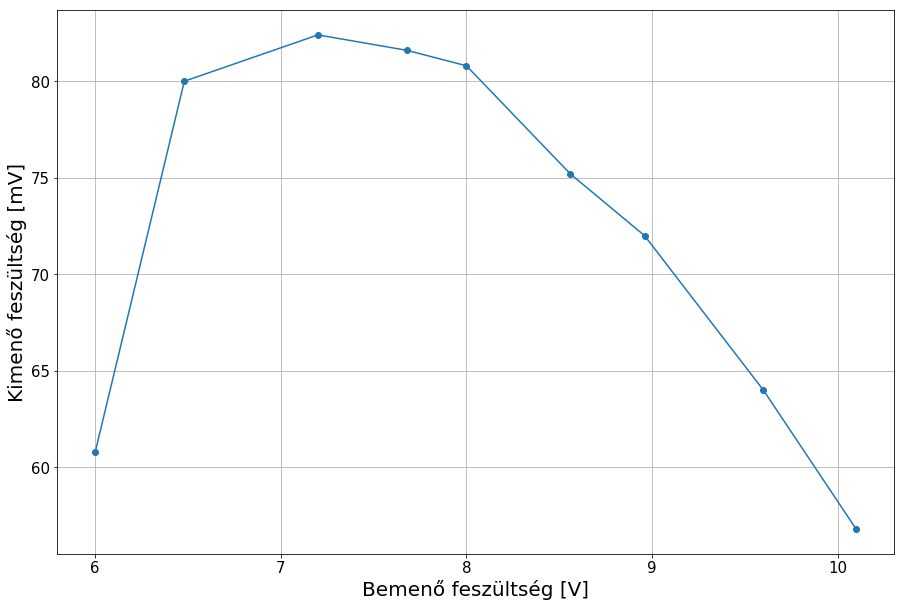

In [21]:
figure(figsize = (15,10))
plot(U_be,U_k,'o-')
xlabel('Bemenő feszültség [V]', fontsize = 20)
ylabel('Kimenő feszültség [mV]', fontsize = 20)
plt.tick_params(labelsize = 15)
grid()
savefig('fesz.eps')

In [22]:
#u = []
#for i in range(len(U_ki)):
#    u.append(U_ki[i]/max(U_ki))

In [23]:
#plot(U_be, u)